In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bernoulli_range = list(range(1, 10))
prior_range = [round(v, 1) for v in np.linspace(0, 1, 11)]
prior_range, bernoulli_range

([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 [1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
df_results = pd.DataFrame()
for nr_bernoullies in bernoulli_range:
    print(nr_bernoullies)
    for prior in prior_range:
        str_to_call = f"dotnet run {nr_bernoullies} {prior}"
        os.system(str_to_call)

        df = pd.read_csv('./results.csv', sep=';')
        df['nr_bernoullies'] = nr_bernoullies
        df['prior'] = prior

        df_results = pd.concat([df_results, df])

1
2
3
4
5
6
7
8
9


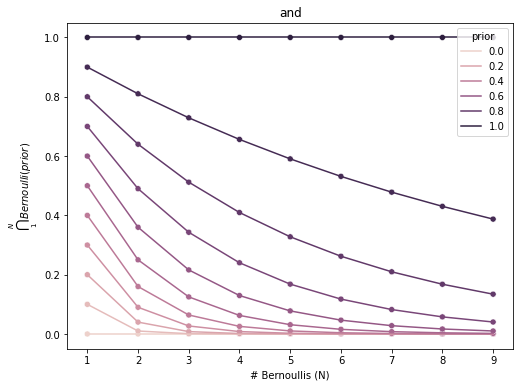

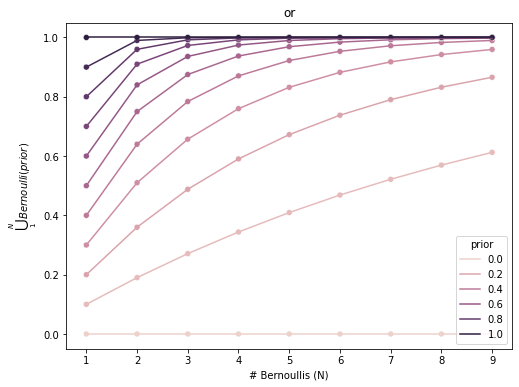

In [4]:
for _ in ['and', 'or']:
    df = df_results[df_results.variable == _] 
    fig = plt.figure(figsize=(8,6))
    y = df['mean']
    x= df['nr_bernoullies']
    c = df['prior']
    sns.lineplot(data=df,
    x=x,
    y=y,
    hue=c)

    sns.scatterplot(data=df,
    x=x,legend=False,
    y=y,
    hue=c)
    
    title = "$\\bigcap_{1}^{N} " if _ != 'or' else "$\\bigcup_{1}^{N}"
    title = title + "\\;{Bernoulli(prior)}$"
    plt.title(_)
    plt.xlabel('# Bernoullis (N)' )
    plt.ylabel(title)    
    fig.show()
    fig.savefig(_+'.jpg')
